In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler


In [4]:
import seaborn as sns
sns.set_style("whitegrid")

In [5]:
state = 'AL'

In [6]:
file_symptoms = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_symptoms_df.fea'
symptoms_dataframe_ri = pd.read_feather(file_symptoms)


In [7]:
symptoms_dataframe_ri = symptoms_dataframe_ri.dropna()

In [8]:
symptoms_df = symptoms_dataframe_ri.iloc[:,17:]

In [9]:
symptoms_df['cj_living_area'] = symptoms_dataframe_ri['cj_living_area']
symptoms_df['avmValue'] = symptoms_dataframe_ri['avmValue']

In [22]:
predictor_columns = symptoms_df.columns

In [10]:
Predictors = symptoms_df.to_numpy()

In [11]:
Predictors.shape

(205759, 2226)

In [12]:
predictand = symptoms_dataframe_ri.avmerror.values

In [13]:
predictand.shape

(205759,)

In [14]:
train_samples = 150000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    Predictors,
    predictand,
    shuffle=True,
    test_size=len(Predictors) - train_samples,
)

In [15]:
#model = RandomForestRegressor(n_estimators = 100,  min_samples_leaf=30, 
#                              max_features = 6, max_depth=40
#                              )

model = RandomForestRegressor(n_estimators = 10,  min_samples_leaf=20, 
                              max_features = 25, max_depth=40
                              )
                              


In [16]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=40, max_features=25, min_samples_leaf=20,
                      n_estimators=10)

In [17]:
print(model.get_params(deep=True))

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 40, 'max_features': 25, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [18]:
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

In [19]:
y_train.min()

-1.497061914191419

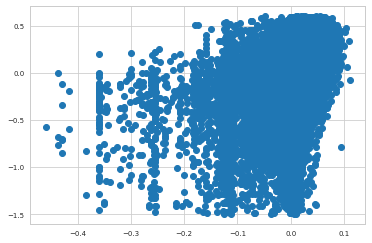

In [20]:
plt.plot(predictions_train,y_train,'o')

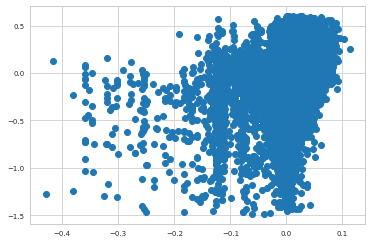

In [21]:
plt.plot(predictions_test,y_test,'o')

In [141]:
df = symptoms_dataframe_ri.copy()


In [142]:
predictions_test_value = df['avmValue'].values[train_samples:]/(1-predictions_test)
predictions_train_value = df['avmValue'].values[:train_samples]/(1-predictions_train)
#predictions_train_value = df['avmValue'].values/(1-Predictors)

In [143]:
df.columns

Index(['listingid', 'qtr', 'tax_year', 'cbsa_div', 'cbsa', 'state',
       'Transdate', 'Transprice', 'cj_living_area', 'fips_code',
       ...
       'grinder pump', 'immaculate custom', 'high efficiency',
       'plenty room roam', 'neighborhood prattville', 'letson farms',
       'one of a kind home', 'adjacent lot', 'luxury vinyl',
       'spacious secondary bedrooms'],
      dtype='object', length=2241)

In [144]:
print(np.mean(np.abs(df['Transprice'].values[:train_samples]-predictions_train_value)/\
              (df['Transprice'].values[:train_samples])))
print(np.mean(np.abs(df['Transprice'].values[:train_samples]- df['avmValue'].values[:train_samples])/\
              (df['Transprice'].values[:train_samples])))


0.13953571940187132
0.14185532301003315


In [145]:
print(np.mean(np.abs(df['Transprice'].values[train_samples:]-predictions_test_value)/\
              (df['Transprice'].values[train_samples:])))
print(np.mean(np.abs(df['Transprice'].values[train_samples:]- df['avmValue'].values[train_samples:])/\
              (df['Transprice'].values[train_samples:])))


0.12204119641223693
0.12433022988479138


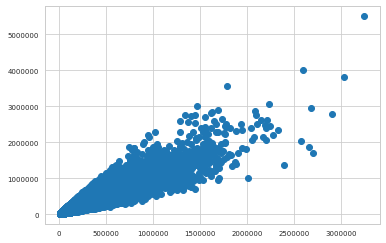

In [133]:
plt.plot(predictions_train_value,df['Transprice'].values[:train_samples],'o')

In [119]:
df.columns

Index(['listingid', 'qtr', 'tax_year', 'cbsa_div', 'cbsa', 'state',
       'Transdate', 'Transprice', 'cj_living_area', 'fips_code',
       ...
       'grinder pump', 'immaculate custom', 'high efficiency',
       'plenty room roam', 'neighborhood prattville', 'letson farms',
       'one of a kind home', 'adjacent lot', 'luxury vinyl',
       'spacious secondary bedrooms'],
      dtype='object', length=2241)

In [ ]:
fig = plt.figure(figsize=(12,10))
importances = model.feature_importances_
indices = np.argsort(importances)
features = predictor_columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
[features[i] for i in indices]

In [120]:
import joblib
filename = 'RF_newmodel_'+state+'_symptoms_01.sav'
joblib.dump(model,filename)

['RF_newmodel_AL_symptoms_01.sav']